In [270]:
import pandas as pd
import seaborn as sns

In [271]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/base/Results/MCAMetric_Supply.csv")
MCACapacity = MCACapacity[MCACapacity.commodity=="electricity"]

In [272]:
MCACapacity.technology.unique()

array(['Geothermal Power Plant', 'Biomass Power Plant',
       'Large Hydropower Plant (Dam) (>100MW)',
       'Light Fuel Oil Power Plant', 'Medium Hydropower Plant (10-100MW)',
       'Oil Fired Gas Turbine (SCGT)', 'Onshore Wind',
       'Solar PV (Distributed with Storage)', 'Solar PV (Utility)',
       'Coal Power Plant'], dtype=object)

In [273]:
replace_dict = {"Biomass Power Plant": "Non-intermittent renewables", 
                "Geothermal Power Plant": "Non-intermittent renewables", 
                "Large Hydropower Plant (Dam) (>100MW)": "Non-intermittent renewables", 
                "Light Fuel Oil Power Plant": "Fossil fuel",
                "Medium Hydropower Plant (10-100MW)": "Non-intermittent renewables",
                "Oil Fired Gas Turbine (SCGT)": "Fossil fuel",
                "Onshore Wind": "Intermittent renewables",
                "Solar PV (Distributed with Storage)": "Intermittent renewables",
                "Solar PV (Utility)": "Intermittent renewables",
                "Coal Power Plant": "Fossil fuel",
                'Off-grid Hydropower': "Non-intermittent renewables", 
                'Offshore Wind': "Intermittent renewables"}

MCACapacity['Power Type'] = MCACapacity['technology'].replace(replace_dict)
MCACapacity

,Unnamed: 0,timeslice,commodity,region,technology,year,agent,category,sector,supply,Power Type
11,11,"('winter', 'all-week', 'night')",electricity,Kenya,Geothermal Power Plant,2020.0,A1,newcapa,power,0.000000,Non-intermittent renewables
23,23,"('winter', 'all-week', 'day')",electricity,Kenya,Geothermal Power Plant,2020.0,A1,newcapa,power,0.000000,Non-intermittent renewables
35,35,"('spring', 'all-week', 'night')",electricity,Kenya,Geothermal Power Plant,2020.0,A1,newcapa,power,0.000000,Non-intermittent renewables
47,47,"('spring', 'all-week', 'day')",electricity,Kenya,Geothermal Power Plant,2020.0,A1,newcapa,power,0.000000,Non-intermittent renewables
59,59,"('summer', 'all-week', 'night')",electricity,Kenya,Geothermal Power Plant,2020.0,A1,newcapa,power,0.000000,Non-intermittent renewables
...,...,...,...,...,...,...,...,...,...,...,...
16027,16027,"('autumn', 'all-week', 'day')",electricity,Kenya,Geothermal Power Plant,2050.0,A1,retrofit,power,5.225446,Non-intermittent renewables
16028,16028,"('autumn', 'all-week', 'day')",electricity,Kenya,Biomass Power Plant,2050.0,A1,retrofit,power,0.850337,Non-intermittent renewables
16029,16029,"('autumn', 'all-week', 'day')",electricity,Kenya,Coal Power Plant,2050.0,A1,retrofit,power,0.971558,Fossil fuel
16030,16030,"('autumn', 'all-week', 'day')",electricity,Kenya,Geothermal Power Plant,2050.0,A1,retrofit,power,7.295029,Non-intermittent renewables


In [274]:
capacity_grouped = MCACapacity.groupby(['Power Type', "year"]).sum().reset_index().set_index(["Power Type", "year"])
capacity_grouped

Unnamed: 0      supply
Power Type                  year                          
Fossil fuel                 2020.0        9232   14.655541
                            2025.0       25440   11.594714
                            2030.0       67376    8.447425
                            2035.0      272184   10.952775
                            2040.0      571888   13.178447
                            2045.0      517328   14.852103
                            2050.0     1341328   22.193793
Intermittent renewables     2020.0       13920    1.796620
                            2025.0       38232    1.420087
                            2030.0       67392    1.034158
                            2035.0      228456    0.716477
                            2040.0      376632    0.516546
                            2045.0      258552    0.366893
                            2050.0      670440    0.265341
Non-intermittent renewables 2020.0       18816   18.107839
                            2025.0       71672   40.309198
                            2030.0      173712   62.606418
                            2035.0      620408  109.676748
                            2040.0     1269208  156.909007
                            2045.0     1197240  204.643004
                            2050.0     3026544  246.660865

In [275]:
osemosys_output = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/kenya-generated-output.csv")
osemosys_output = osemosys_output.rename(columns={"Row Labels": "year"})
osemosys_output

,year,PWRHYD001,PWRHYD002,PWROHC002,PWRSOL001,PWRWND001,PWRHYD004,PWRSOL002,PWRBIO001,PWRCOA001,PWRGEO,PWRWND002,PWRTRNIMP
0,2020,7.499807,3.739383,4.170240,0.118999,2.007113,0.096716,0.218892,1.051376,NaN,28.629395,NaN,0.3
1,2021,7.499807,3.739383,3.852597,0.118999,2.007113,4.508902,0.218892,1.234643,0.252323,35.196344,NaN,0.3
2,2022,7.499807,3.739383,3.471280,0.118999,2.007113,4.508902,0.218892,1.411020,0.271320,39.317065,NaN,0.3
3,2023,7.499807,3.739383,3.445235,0.118999,2.007113,4.508902,0.218892,1.411020,0.252323,42.376701,NaN,0.3
4,2024,7.499807,1.803561,2.591588,0.118999,2.007113,4.508902,0.218892,1.411020,0.216277,48.416304,NaN,0.3
5,2025,7.499807,1.803561,2.317284,0.118999,2.007113,4.508902,0.218892,1.411020,0.216277,52.217499,NaN,0.3
6,2026,7.499807,1.803561,2.262736,0.118999,2.007113,4.508902,0.218892,1.399865,0.216277,56.815378,NaN,0.3
7,2027,7.499807,1.803561,2.098904,0.118999,2.007113,4.508902,0.218892,1.319392,0.216277,61.845579,NaN,0.3
8,2028,4.118130,1.803561,1.109180,0.118999,2.007113,4.508902,0.218892,1.411020,0.210269,71.200362,NaN,0.3
9,2029,4.118130,1.803561,1.081258,0.118999,2.007113,4.508902,0.218892,1.411020,0.210269,76.682512,NaN,0.3


In [276]:
osemosys_output = osemosys_output.fillna(0)
osemosys_output_long = osemosys_output.melt(id_vars="year")
osemosys_output_long.head()

,year,variable,value
0,2020,PWRHYD001,7.499807
1,2021,PWRHYD001,7.499807
2,2022,PWRHYD001,7.499807
3,2023,PWRHYD001,7.499807
4,2024,PWRHYD001,7.499807


In [277]:
def outputs_osemosys_to_muse(data):
    data_long = data.melt(id_vars="year")

    conversion_techs = {'PWRHYD001': "Large Hydropower Plant (Dam) (>100MW)", 
                        'PWRHYD002':"Medium Hydropower Plant (10-100MW)", 
                        'PWROHC002':"Oil Fired Gas Turbine (SCGT)", 
                        'PWRSOL001':"Solar PV (Utility)", 
                        'PWRWND001':"Onshore Wind",
                        'PWRHYD004':"Off-grid Hydropower", 
                        'PWRSOL002':"Solar PV (Distributed with Storage)", 
                        'PWRBIO001':"Biomass Power Plant", 
                        'PWRCOA001':"Coal Power Plant", 
                        'PWRGEO':"Geothermal Power Plant",
                        'PWRWND002':"Offshore Wind", 
                        'PWRTRNIMP':"Electricity Imports",
                        'PWRSOL001S':"Utility scale PV with 2 hour storage",
                        'PWROHC001':"Light Fuel Oil Power Plant",
                        'PWRNGS001':"Gas Power Plant (CCGT)",
                        'PWRNGS002':"Gas Power Plant (SCGT)"}

    data_long['technology'] = data_long["variable"].replace(conversion_techs)
    data_long = data_long.drop('variable', axis=1)
    data_long = data_long.rename(columns={"value":"generated"})
    
    data_long['Power Type'] = data_long['technology'].replace(replace_dict)
    data_long = data_long[data_long['technology']!="Electricity Imports"]

    return data_long

In [278]:
base_osemosys = outputs_osemosys_to_muse(osemosys_output)
base_osemosys

,year,generated,technology,Power Type
0,2020,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
336,2046,0.000000,Offshore Wind,Intermittent renewables
337,2047,0.000000,Offshore Wind,Intermittent renewables
338,2048,1.384978,Offshore Wind,Intermittent renewables
339,2049,12.416133,Offshore Wind,Intermittent renewables


In [279]:
osemosys_simplified = base_osemosys.groupby(["Power Type", "year"]).sum()
osemosys_simplified = osemosys_simplified.reset_index()
osemosys_simplified

,Power Type,year,generated
0,Fossil fuel,2020,4.170240
1,Fossil fuel,2021,4.104921
2,Fossil fuel,2022,3.742600
3,Fossil fuel,2023,3.697558
4,Fossil fuel,2024,2.807865
...,...,...,...
88,Non-intermittent renewables,2046,227.439006
89,Non-intermittent renewables,2047,240.287180
90,Non-intermittent renewables,2048,249.312720
91,Non-intermittent renewables,2049,244.979051


In [280]:
capacity_grouped = capacity_grouped.reset_index()
capacity_grouped

,Power Type,year,Unnamed: 0,supply
0,Fossil fuel,2020.0,9232,14.655541
1,Fossil fuel,2025.0,25440,11.594714
2,Fossil fuel,2030.0,67376,8.447425
3,Fossil fuel,2035.0,272184,10.952775
4,Fossil fuel,2040.0,571888,13.178447
5,Fossil fuel,2045.0,517328,14.852103
6,Fossil fuel,2050.0,1341328,22.193793
7,Intermittent renewables,2020.0,13920,1.796620
8,Intermittent renewables,2025.0,38232,1.420087
9,Intermittent renewables,2030.0,67392,1.034158


In [281]:
merged_table = pd.merge(capacity_grouped, osemosys_simplified)
merged_table = merged_table.drop(["Unnamed: 0"], axis=1).rename(columns={"supply":"MUSE", "generated":"OSeMOSYS"})
merged_table

,Power Type,year,MUSE,OSeMOSYS
0,Fossil fuel,2020.0,14.655541,4.170240
1,Fossil fuel,2025.0,11.594714,2.533561
2,Fossil fuel,2030.0,8.447425,1.118709
3,Fossil fuel,2035.0,10.952775,0.586315
4,Fossil fuel,2040.0,13.178447,0.216048
5,Fossil fuel,2045.0,14.852103,0.587872
6,Fossil fuel,2050.0,22.193793,0.734353
7,Intermittent renewables,2020.0,1.796620,2.345003
8,Intermittent renewables,2025.0,1.420087,2.345003
9,Intermittent renewables,2030.0,1.034158,2.344946


In [282]:
merged_table['MUSE_share'] = merged_table.MUSE/merged_table.groupby('year').MUSE.transform('sum')
merged_table['OSeMOSYS_share'] = merged_table.OSeMOSYS/merged_table.groupby('year').OSeMOSYS.transform('sum')
merged_table

,Power Type,year,MUSE,OSeMOSYS,MUSE_share,OSeMOSYS_share
0,Fossil fuel,2020.0,14.655541,4.170240,0.424061,0.087736
1,Fossil fuel,2025.0,11.594714,2.533561,0.217439,0.035033
2,Fossil fuel,2030.0,8.447425,1.118709,0.117182,0.011424
3,Fossil fuel,2035.0,10.952775,0.586315,0.090261,0.004307
4,Fossil fuel,2040.0,13.178447,0.216048,0.077246,0.001128
5,Fossil fuel,2045.0,14.852103,0.587872,0.067552,0.002364
6,Fossil fuel,2050.0,22.193793,0.734353,0.082468,0.002151
7,Intermittent renewables,2020.0,1.796620,2.345003,0.051986,0.049335
8,Intermittent renewables,2025.0,1.420087,2.345003,0.026631,0.032426
9,Intermittent renewables,2030.0,1.034158,2.344946,0.014346,0.023947


In [283]:
reduced_table = merged_table[merged_table['year'].isin([2030, 2050])].set_index(["Power Type", "year"])[['MUSE_share', "OSeMOSYS_share"]]
reduced_table = reduced_table*100
reduced_table = reduced_table.round()
reduced_table = reduced_table.rename(columns={"MUSE_share": "MUSE (%)", "OSeMOSYS_share": "OSeMOSYS (%)"})
reduced_table.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/reports/tables/reduced_table.csv")

In [284]:
base_osemosys.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/kenya-supply-output.csv")
base_osemosys

,year,generated,technology,Power Type
0,2020,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
336,2046,0.000000,Offshore Wind,Intermittent renewables
337,2047,0.000000,Offshore Wind,Intermittent renewables
338,2048,1.384978,Offshore Wind,Intermittent renewables
339,2049,12.416133,Offshore Wind,Intermittent renewables


<AxesSubplot:xlabel='year', ylabel='generated'>

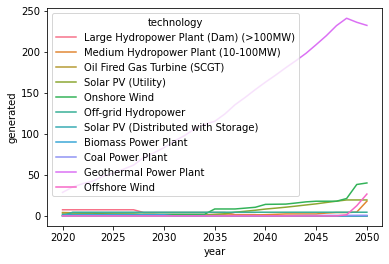

In [285]:
sns.lineplot(data=base_osemosys, x="year", y="generated", hue="technology")

## Fossil fuel scenario

In [286]:
osemosys_fossil = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/Kenya-FF-Results-DC.csv")
osemosys_fossil.head()

,Row Labels,PWRHYD001,PWRHYD002,PWRNGS001,PWROHC001,PWROHC002,PWRSOL001,PWRWND001,PWRNGS002,PWRHYD004,PWRSOL002,PWRBIO001,PWRCOA001,PWRGEO,PWRTRNIMP
0,2020,7.499807,9.021613,0.732532,0.201847,4.376505,0.118999,2.007113,NaN,0.096716,0.218892,1.063421,NaN,15.784283,0.3
1,2021,7.499807,9.021613,0.592559,NaN,3.458566,0.118999,2.007113,NaN,0.096716,0.218892,1.234643,3.070593,16.033866,0.3
2,2022,7.499807,9.021613,0.523831,NaN,3.391344,0.118999,2.007113,NaN,0.096716,0.218892,1.234643,5.337030,16.293409,0.3
3,2023,7.499807,9.021613,0.488355,NaN,3.319419,0.118999,2.007113,NaN,0.096716,0.218892,1.411020,7.795885,16.322833,0.3
4,2024,7.499807,7.085792,NaN,NaN,NaN,0.118999,2.007113,NaN,0.096716,0.218892,1.411020,16.273554,16.322833,0.3


In [287]:
osemosys_fossil = osemosys_fossil.rename(columns={"Row Labels": "year"})


In [288]:
fossil_osemosys = outputs_osemosys_to_muse(osemosys_fossil)
fossil_osemosys

,year,generated,technology,Power Type
0,2020,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
398,2046,NaN,Geothermal Power Plant,Non-intermittent renewables
399,2047,NaN,Geothermal Power Plant,Non-intermittent renewables
400,2048,NaN,Geothermal Power Plant,Non-intermittent renewables
401,2049,NaN,Geothermal Power Plant,Non-intermittent renewables


In [289]:
fossil_osemosys.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/fossil-fuel-kenya-supply-output.csv")

## Net-zero

In [290]:
osemosys_net_zero = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/Kenya-NZv2-Results-DC.csv")
osemosys_net_zero = osemosys_net_zero.rename(columns={"Row Labels": "year"})

In [291]:
net_zero_osemosys = outputs_osemosys_to_muse(osemosys_net_zero)
net_zero_osemosys

,year,generated,technology,Power Type
0,2020,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,7.499807,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
305,2046,58.607337,Geothermal Power Plant,Non-intermittent renewables
306,2047,69.035664,Geothermal Power Plant,Non-intermittent renewables
307,2048,79.555485,Geothermal Power Plant,Non-intermittent renewables
308,2049,98.110239,Geothermal Power Plant,Non-intermittent renewables


In [292]:
pd.unique(net_zero_osemosys.technology)

array(['Large Hydropower Plant (Dam) (>100MW)',
       'Medium Hydropower Plant (10-100MW)',
       'Oil Fired Gas Turbine (SCGT)', 'Solar PV (Utility)',
       'Onshore Wind', 'Utility scale PV with 2 hour storage',
       'Off-grid Hydropower', 'Solar PV (Distributed with Storage)',
       'Biomass Power Plant', 'Geothermal Power Plant'], dtype=object)

In [293]:
net_zero_osemosys.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/net-zero-kenya-supply-output.csv")


# Capacities
## Base Scenario

In [294]:
osemosys_capacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/kenya-capacity-output.csv")
osemosys_capacity = osemosys_capacity.rename(columns={"Row Labels": "year"})

osemosys_capacity_base = outputs_osemosys_to_muse(osemosys_capacity)

In [295]:
osemosys_capacity_base.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/osemosys_capacity_base.csv")


## Fossil-fuel scenario

In [296]:
fossil_fuel_capacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/Kenya-FF-Results-capacity.csv")
fossil_fuel_capacity = fossil_fuel_capacity.rename(columns={"Row Labels": "year"})
fossil_fuel_capacity

,year,PWRHYD001,PWRHYD002,PWRNGS001,PWROHC001,PWROHC002,PWRSOL001,PWRWND001,PWRNGS002,PWRHYD004,PWRSOL002,PWRBIO001,PWRCOA001,PWRGEO
0,2020,0.499,0.600253,0.036646,0.2875,0.447,0.024,0.31,NaN,0.006435,0.037840,0.09,NaN,0.655623
1,2021,0.499,0.600253,0.036646,NaN,0.447,0.024,0.31,NaN,0.006435,0.037840,0.09,0.154141,0.655623
2,2022,0.499,0.600253,0.036646,NaN,0.447,0.024,0.31,NaN,0.006435,0.037840,0.09,0.254335,0.655623
3,2023,0.499,0.600253,0.036646,NaN,0.447,0.024,0.31,NaN,0.006435,0.037840,0.09,0.361540,0.655623
4,2024,0.499,0.471454,0.036646,NaN,0.327,0.024,0.31,NaN,0.006435,0.037840,0.09,0.981500,0.655623
5,2025,0.499,0.471454,0.036646,NaN,0.327,0.024,0.31,NaN,0.006435,0.037840,0.09,0.981500,0.655623
6,2026,0.499,0.471454,0.039305,NaN,0.252,0.024,0.31,NaN,0.006435,0.037840,0.09,0.981500,0.655623
7,2027,0.499,0.471454,0.208171,NaN,0.252,0.024,0.31,NaN,0.006435,0.037840,0.09,0.981500,0.655623
8,2028,0.274,0.471454,0.244452,NaN,0.252,0.024,0.31,NaN,0.006435,0.037840,0.09,1.202598,0.655623
9,2029,0.274,0.471454,0.284063,NaN,0.252,0.024,0.31,NaN,0.006435,0.037840,0.09,1.355827,0.655623


In [297]:
fossil_fuel_capacity = outputs_osemosys_to_muse(fossil_fuel_capacity)
fossil_fuel_capacity

,year,generated,technology,Power Type
0,2020,0.499,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,0.499,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,0.499,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,0.499,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,0.499,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
398,2046,NaN,Geothermal Power Plant,Non-intermittent renewables
399,2047,NaN,Geothermal Power Plant,Non-intermittent renewables
400,2048,NaN,Geothermal Power Plant,Non-intermittent renewables
401,2049,NaN,Geothermal Power Plant,Non-intermittent renewables


In [298]:
fossil_fuel_capacity.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/osemosys_capacity_fossil_fuel.csv")


## Net-zero scenario

In [299]:
net_zero_capacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/external/osemosys-outputs/Kenya-NZv2-Results-capacity.csv")
net_zero_capacity = net_zero_capacity.rename(columns={"Row Labels": "year"})
net_zero_capacity

,year,PWRHYD001,PWRHYD002,PWROHC001,PWROHC002,PWRSOL001,PWRWND001,PWRSOL001S,PWRHYD004,PWRSOL002,PWRBIO001,PWRGEO
0,2020,0.499,0.248800,0.2875,0.447,0.024000,0.310000,NaN,0.006435,0.037840,0.09,0.888317
1,2021,0.499,0.248800,NaN,0.447,0.024000,0.310000,NaN,0.006435,0.037840,0.09,1.239292
2,2022,0.499,0.248800,NaN,0.447,0.024000,0.310000,NaN,0.006435,0.037840,0.09,1.515997
3,2023,0.499,0.248800,NaN,0.447,0.024000,0.310000,NaN,0.006435,0.037840,0.09,1.644016
4,2024,0.499,0.120000,NaN,0.327,0.024000,0.310000,NaN,0.006435,0.037840,0.09,1.998076
5,2025,0.499,0.120000,NaN,0.327,0.359377,0.310000,NaN,0.006435,0.037840,0.09,1.998076
6,2026,0.499,0.120000,NaN,0.252,0.600600,0.310000,NaN,0.006435,0.037840,0.09,2.070567
7,2027,0.499,0.120000,NaN,0.252,0.701371,0.310000,NaN,0.006435,0.037840,0.09,2.213255
8,2028,0.274,0.120000,NaN,0.252,1.045587,0.310000,NaN,0.006435,0.037840,0.09,2.483258
9,2029,0.274,0.120000,NaN,0.252,1.121622,0.310000,NaN,0.006435,0.037840,0.09,2.684285


In [300]:
net_zero_capacity = outputs_osemosys_to_muse(net_zero_capacity)
net_zero_capacity

,year,generated,technology,Power Type
0,2020,0.499000,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
1,2021,0.499000,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
2,2022,0.499000,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
3,2023,0.499000,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
4,2024,0.499000,Large Hydropower Plant (Dam) (>100MW),Non-intermittent renewables
...,...,...,...,...
336,2046,2.354024,Geothermal Power Plant,Non-intermittent renewables
337,2047,2.772888,Geothermal Power Plant,Non-intermittent renewables
338,2048,3.195427,Geothermal Power Plant,Non-intermittent renewables
339,2049,3.940698,Geothermal Power Plant,Non-intermittent renewables


In [301]:
net_zero_capacity.to_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/osemosys-outputs/osemosys_capacity_net_zero.csv")
